# Effects of Loan Characterics on Borrower's APR 
## by (Anirban Dey)

## Investigation Overview

In this presentation. Many visualizations on loans's characterics will be created to study their relationship on borrowers's APR. The main characterics are BorrowerAPR, ProsperScore, AvailableBankcardCredit and CreditScoreRangeUpper.

## Dataset Overview

The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, debt, etc. Variables with many missing values were dropped to make the Dataset more accurate. Outliers were also removed to provide more reliable Data. This study will be analyzing factors that could inflence borrow's APR and which loans were taken by what type of borrowers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

df_loan = pd.read_csv('ProsperLoanData.csv')


In [4]:
# data wrangling


# filter out loans without ProsperScores
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

# remove unwanted columns and columns with many empty values
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

# remove fewer people who has high Creditavailible
High_Creditavailible = df_loan_2[df_loan_2['AvailableBankcardCredit'] > 150000]
df_loan_3 = df_loan_2.drop(High_Creditavailible.index)

## (Visualization 1)

> ***Distribution of BorrowerAPR***

Observe the counts for all BorrowerAPR values, the lowerest APR is at around 0.05% and the highested is at around 0.41%. Two high counts are found at 0.35797% and 0.35643%.

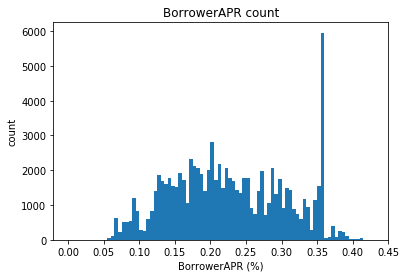

In [5]:
bins = np.arange(0, df_loan_2['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.05));

## (Visualization 2)

***BorrowerAPR vs. ProsperScore***

A PerosperScore was given to each borrowers. The higher the score, the better rating the borrower were received. The plot shows the negative correlation between BorrowerAPR and ProsperScore. The plot explain the higher the APR, the lower the ProsperScore is. This makes sense because borrowers with higher rating tend to received lower interest rate and APR.

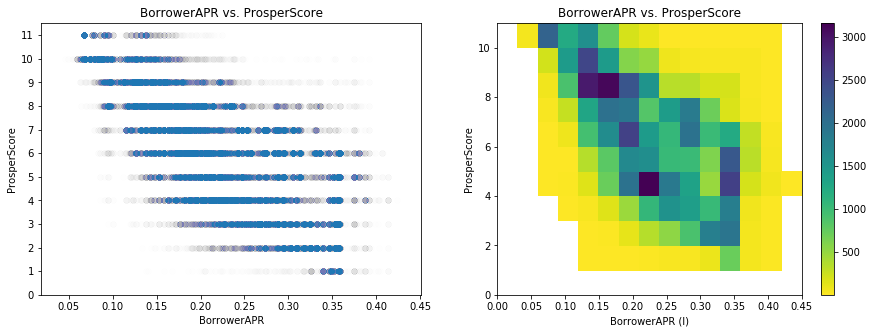

In [6]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');


## (Visualization 3)
***BorrowerAPR vs ProsperScore on each ProsperRatings***

This visualization helps to analyze BorrowerAPR vs ProsperScore on different letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR percentage, and borrowers with high rating (AA) has the lowers APR percentage. This visualization differentiate groups of people in terms of APR received.



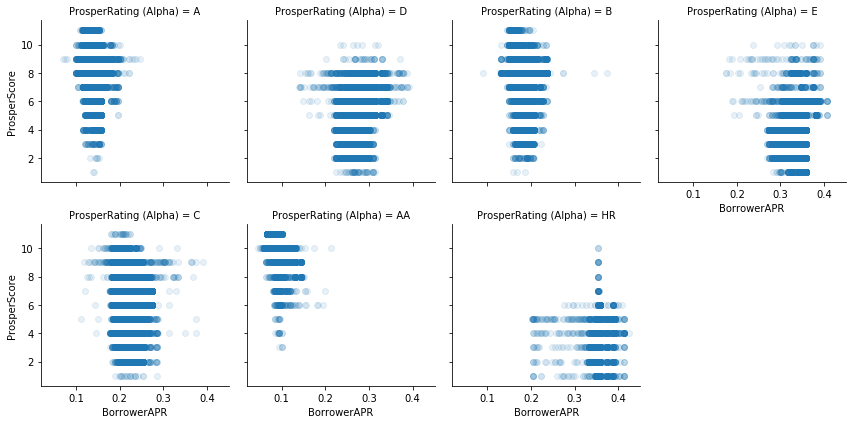

In [7]:
g = sb.FacetGrid(data = df_loan_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!